In [40]:
import scipy.misc
import matplotlib.pyplot as plt
from GraphMaxPooling import GraphMaxPooling
%matplotlib inline

In [41]:
mnist = scipy.misc.imread("../drafts/mnist.png", flatten=True) / 255
# reshape the signal to a vector, r
x = mnist.reshape((-1,))

In [42]:
# take a grid as graph
W = GraphMaxPooling.generate_grid(*mnist.shape)

In [43]:
# instantiate a pooling object to perform 4*(coarsening + maxpooling)
foo_pooling = GraphMaxPooling(W, 8)

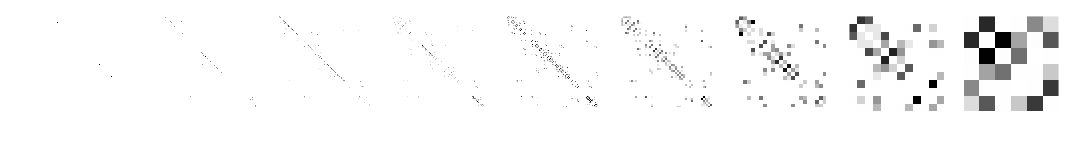

In [44]:
# plot all the W's from the coarsened graphs
foo_pooling.plot_coarsened_W_s()

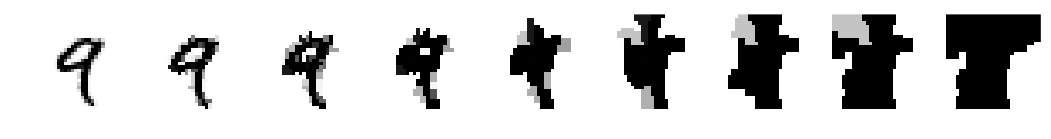

In [45]:
# plot the signal reprojected on the initial graph
foo_pooling.plot_pooled_images(x)

In [46]:
# for instance, let's retrieve the Laplacians for all scales
laplacians = foo_pooling.get_laplacians(how='unn')
print([l.shape for l in laplacians])

[(1536, 1536), (768, 768), (384, 384), (192, 192), (96, 96), (48, 48), (24, 24), (12, 12), (6, 6)]


In [47]:
# we can also get a specific pooled signal: e.g. what's the signal after 6 coasenings?
foo_pooling.one_max_pooling(x, 6)

array([ 0.        ,  0.33725491,  0.        ,  0.98823529,  0.98431373,
        0.        ,  0.98431373,  0.98823529,  0.98823529,  0.98823529,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.98823529,  0.        ,  0.98823529,  0.        ])

In [48]:
# Finally (and most imoprtantely) we can retrieve the way we should reorder the nodes 
# before starting our network to get an efficient 1d like max-pooling
foo_pooling.new_order

array([   0,   28,   56, ..., 1037, 1038, 1039])

## Computationnal time

In [50]:
%timeit foo_pooling.max_pooling(x)

The slowest run took 7.32 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 77.3 µs per loop
